# Задание

Применим полученные навыки для анализа данных о ценах на недвижимость в Бостоне, опубликованных в статье 1978 г. Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США.

Подробнее о наборе данных: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Ваша задача:
1. Построить модель линейной регрессии
2. Получить коэффиценты уравнения линейной регрессии
3. Написать уравнение линейной регрессии
4. Визуализировать данные и полученное уравнение линейной регрессии
5. Посчитать в ручную MSE (расчеты привести в ноутбуке)
6. Посчитать MSE, MAE, R2 с использованием встроенных методов библиотеки sklearn и сделать вывод по полученным метрикам.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

boston = load_boston()

print(boston.DESCR)

In [10]:
columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
model = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('target', axis=1), df['target'], test_size = 0.3)
model.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [23]:
w0 = model.intercept_
w = model.coef_
print(w0, end = ' ')
x = df.drop('target', axis = 1).columns
for i in range(w.shape[0]):
  print(f'+ {w[i]} {x[i]}', end = ' ')
# Ряд признаков, такие как CRIM, ZN, INDUS, AGE, TAX, B, имеет близкие к нолю значения
# Поэтому их следует убрать

24.411884581640294 + -0.050615735871010585 CRIM + 0.033209455312426514 ZN + 0.02878806504614734 INDUS + 3.2658591871712903 CHAS + -14.722477917375869 NOX + 4.67876674079286 RM + -0.0016827027654383467 AGE + -1.2025527661074105 DIS + 0.22824148891003498 RAD + -0.00921835795606328 TAX + -0.8043581897042481 PTRATIO + 0.01059544373822968 B + -0.5157365929190553 LSTAT 

In [36]:
final_df = df.drop(['CRIM', 'ZN', 'INDUS', 'AGE', 'TAX', 'B'], axis=1)
new_model = LinearRegression()
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(final_df.drop('target', axis=1), df['target'], test_size = 0.3)
new_model.fit(new_xtrain, new_ytrain)

w0 = new_model.intercept_
w = new_model.coef_
print(w0, end = ' ')
x = final_df.drop('target', axis=1).columns
for i in range(x.size):
  print(f'+ {w[i]} {x[i]}', end = ' ')

41.02988167826307 + 2.7039561758803936 CHAS + -22.09597530521882 NOX + 4.0160439605336755 RM + -1.2493324033524402 DIS + 0.09256683791579534 RAD + -1.0601144007562695 PTRATIO + -0.645286183103102 LSTAT 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


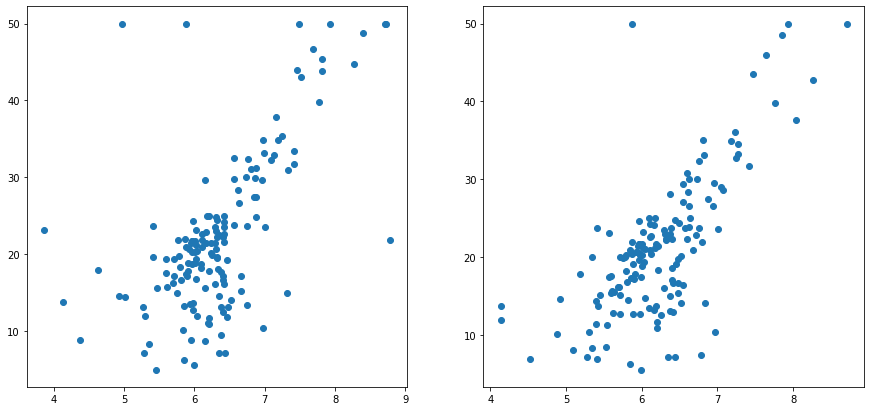

In [45]:
ypred = model.predict(xtest)
new_ypred = new_model.predict(new_xtest)

fig, ax = plt.subplots(1, 2)

ax[0].scatter(xtest['RM'], ytest)
ax[1].scatter(new_xtest['RM'], new_ytest)
fig.set_figheight(7)
fig.set_figwidth(15)

plt.show()


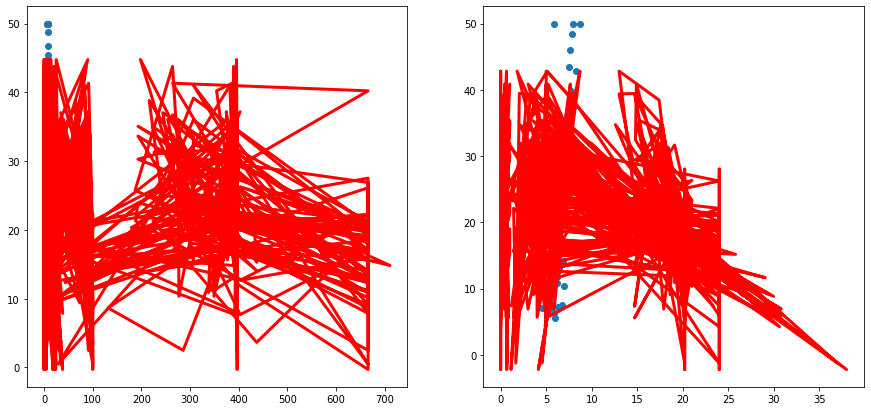

In [58]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
ax[0].scatter(np.array(xtest['RM']).reshape((-1,1)), np.array(ytest))
ax[0].plot(xtest, ypred, color="red", linewidth=3)
ax[1].scatter(np.array(new_xtest['RM']).reshape((-1,1)), np.array(new_ytest))
ax[1].plot(new_xtest, new_ypred, color="red", linewidth=3)
plt.show()

In [60]:
b = (ytest - ypred)**2
print("MSE =", sum(b)/len(b))

b = (new_ytest - new_ypred)**2
print("MSE =", sum(b)/len(b))
# По значения MSE видно, что модель с меньшим кол-вом параметров работает лучше

MSE = 33.888481348911526
MSE = 23.24339759092779


In [61]:
print('Mean Absolute Error:', mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 score:', r2_score(ytest, ypred))
print('\n')
print('Mean Absolute Error:', mean_absolute_error(new_ytest, new_ypred))
print('Mean Squared Error:', mean_squared_error(new_ytest, new_ypred))
print('R2 score:', r2_score(new_ytest, new_ypred))
# По полученным результатам видно, что 
# Модель с меньшим кол-вом признакам работает лучше
# И что модели работают не так плохо как могли  

Mean Absolute Error: 3.9186863872047284
Mean Squared Error: 33.88848134891154
R2 score: 0.6818999916784907


Mean Absolute Error: 3.4008602490067013
Mean Squared Error: 23.24339759092777
R2 score: 0.714307974245794
